> This is a rework of my task during Computer Vision class in 2022.

> Goal(s):
- to demonstrate a contrast enhancement algorithm on a low contrast image, then show side by side the image and its associated histogram of both the original and the transformed images.

# Import Library

In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# Image Preparation

In [2]:
url = 'https://lanoirimage.com/wp-content/uploads/2018/02/Chris-Gampat-La-Noir-Image-Low-Contrast-black-and-white-4-1000x667.jpg'

In [3]:
def generate_img(url):
  req = urllib.request.Request(url, headers={'User-Agent': 'Mozilla/5.0'})
  img_data = urllib.request.urlopen(req).read()
  img_array = np.frombuffer(img_data, np.uint8)
  img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
  return img

In [4]:
def show_img(img, title, cmap=None):
  plt.imshow(img, cmap=cmap)
  plt.title(title)
  plt.axis('off')

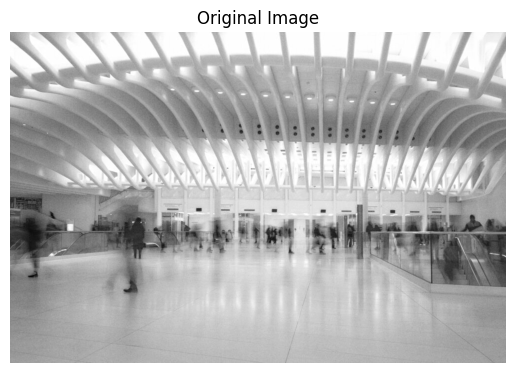

In [5]:
img = cv2.cvtColor(generate_img(url), cv2.COLOR_BGR2GRAY)
show_img(img, 'Original Image', 'gray')

# Histogram of The Original Image

> The function to generate the histogram of original image by counting its intensity from each image.

In [6]:
def generate_hist(img, title):
  intensityCtr = np.zeros(256, dtype=int)
  h = img.shape[0]
  w = img.shape[1]
  for i in range(h):
    for j in range(w):
      intensityCtr[img[i][j]] += 1
  plt.plot(intensityCtr, 'g', label='intensity')
  plt.legend(loc='upper right')
  plt.xlabel('Intensity')
  plt.ylabel('Quantity')
  plt.title(title)
  return intensityCtr

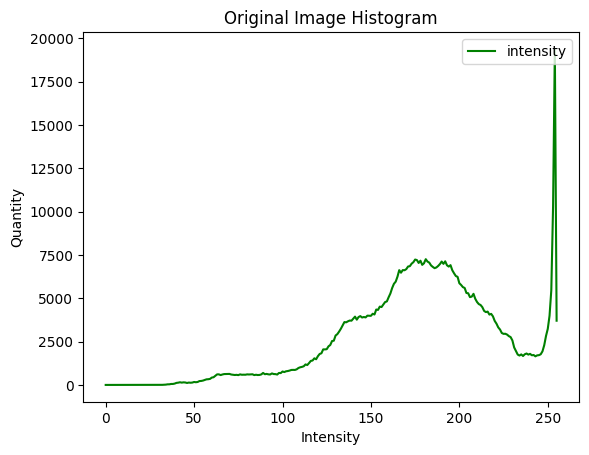

In [7]:
_ = generate_hist(img, 'Original Image Histogram')

# Original Image and Gray Level Slicing A (left)

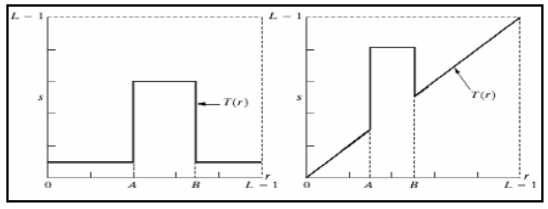

> The first image is boosting the intensity of the image between range A until B and the rest (0 to A and B to L-1) in a constant low level.

> Since the image is unclear, the result of this task is based on the assumption that A is 120 and B is 180.

In [8]:
img_grayslcA = img.copy()
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if (img_grayslcA[i][j] >= 120 and img_grayslcA[i][j] <= 180):
      img_grayslcA[i][j] = 255
    else:
      img_grayslcA[i][j] = 0

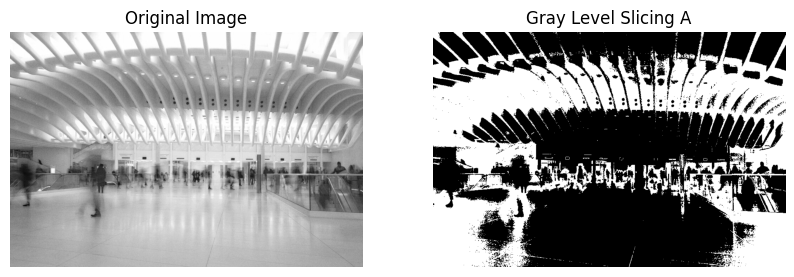

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_img(img, 'Original Image', 'gray')
plt.subplot(1, 2, 2)
show_img(img_grayslcA, 'Gray Level Slicing A', 'gray')

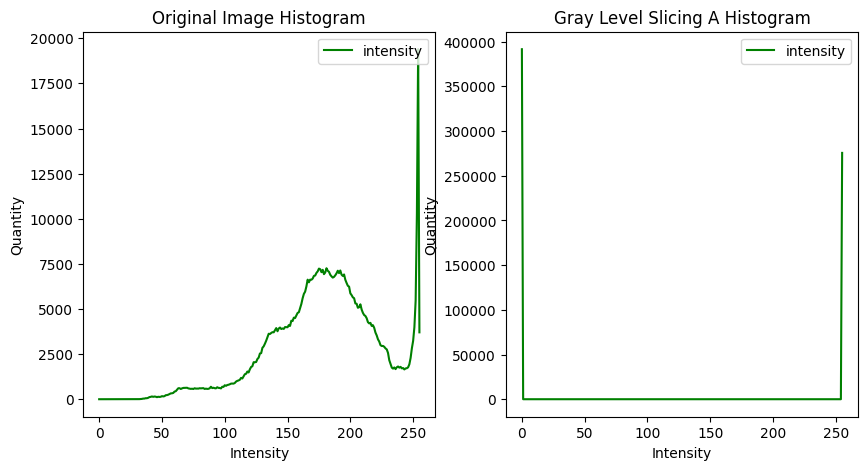

In [10]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
_ = generate_hist(img, 'Original Image Histogram')
plt.subplot(1, 2, 2)
_ = generate_hist(img_grayslcA, 'Gray Level Slicing A Histogram')

# Original Image and Gray Level Slicing B (right)

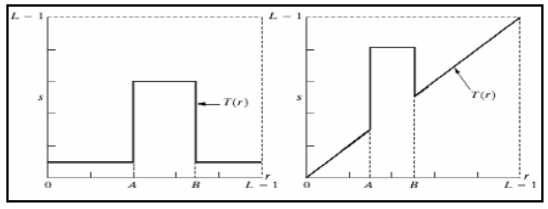

> The second image is boosting the intensity of the image between range A until B but preserves the rest (0 to A and B to L-1) unchanged (input and output are the same).

> Since the image is unclear, the result of this task is based on the assumption that A is 120 and B is 180.

In [11]:
img_grayslcB = img.copy()
for i in range(img.shape[0]):
  for j in range(img.shape[1]):
    if (img_grayslcB[i][j] >= 120 and img_grayslcB[i][j] <= 180):
      img_grayslcB[i][j] = 255

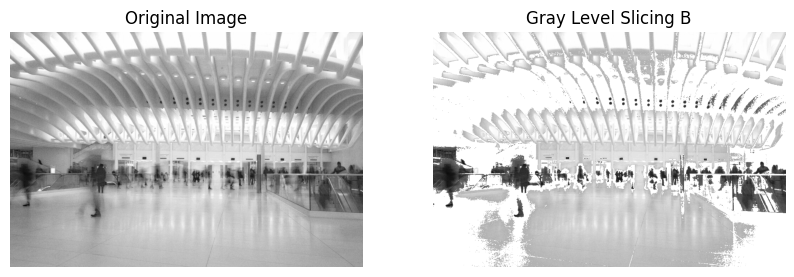

In [12]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
show_img(img, 'Original Image', 'gray')
plt.subplot(1, 2, 2)
show_img(img_grayslcB, 'Gray Level Slicing B', 'gray')

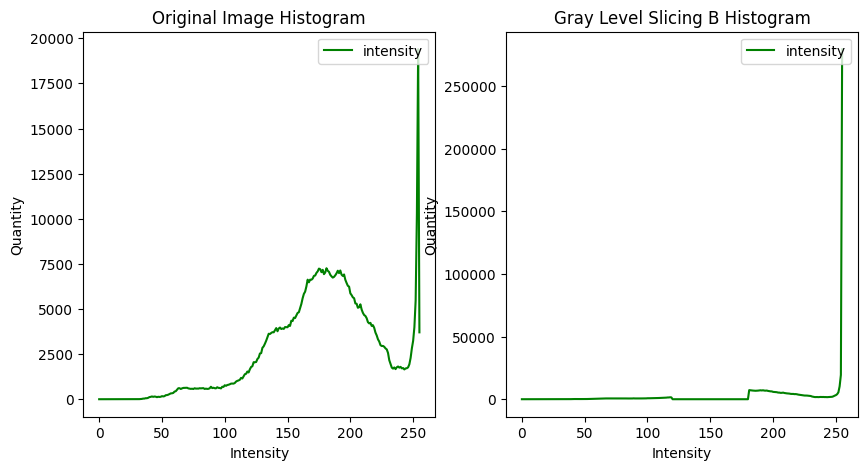

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
_ = generate_hist(img, 'Original Image Histogram')
plt.subplot(1, 2, 2)
_ = generate_hist(img_grayslcB, 'Gray Level Slicing B Histogram')